In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

In [3]:
df = pd.read_csv('diabetes_dataset.csv')

df.head(10)

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0
5,2016,Male,66.0,Alabama,0,0,1,0,0,0,0,not current,27.32,5.7,159,0
6,2015,Female,49.0,Alabama,0,0,1,0,0,0,0,current,24.34,5.7,80,0
7,2016,Female,15.0,Alabama,0,0,0,0,1,0,0,No Info,20.98,5.0,155,0
8,2016,Male,51.0,Alabama,1,0,0,0,0,0,0,never,38.14,6.0,100,0
9,2015,Male,42.0,Alabama,0,0,1,0,0,0,0,No Info,27.32,5.7,160,0


# Diabetes Dataset Description

## Overview
This dataset contains information about individuals, including demographic details, medical history, and health measurements, to determine the presence of diabetes.

## Column Descriptions

- **year**: The year the data was recorded.
- **gender**: The gender of the individual (0 = Male, 1 = Female).
- **age**: Age of the individual in years.
- **location**: Encoded location of the individual.
- **race:AfricanAmerican**: Binary indicator (1 if African American, 0 otherwise).
- **race:Asian**: Binary indicator (1 if Asian, 0 otherwise).
- **race:Caucasian**: Binary indicator (1 if Caucasian, 0 otherwise).
- **race:Hispanic**: Binary indicator (1 if Hispanic, 0 otherwise).
- **race:Other**: Binary indicator (1 if other race, 0 otherwise).
- **hypertension**: Binary indicator for the presence of hypertension (1 = Yes, 0 = No).
- **heart_disease**: Binary indicator for the presence of heart disease (1 = Yes, 0 = No).
- **smoking_history**: Encoded smoking history (categorical value ranging from 0-4).
- **bmi**: Body Mass Index (BMI) measurement.
- **hbA1c_level**: Hemoglobin A1c level, which measures blood sugar levels over time.
- **blood_glucose_level**: Blood glucose level measurement.
- **diabetes**: Target variable (1 = Diabetes present, 0 = No diabetes).

In [4]:
print("Amount of columns: ", df.shape[0])
print(df.isnull().sum())

Amount of columns:  100000
year                    0
gender                  0
age                     0
location                0
race:AfricanAmerican    0
race:Asian              0
race:Caucasian          0
race:Hispanic           0
race:Other              0
hypertension            0
heart_disease           0
smoking_history         0
bmi                     0
hbA1c_level             0
blood_glucose_level     0
diabetes                0
dtype: int64


Checking that there is no null values in the data

In [5]:
for column in df.columns:
    if df[column].dtype == type(object):
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        
df.head(10)

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,0,32.0,0,0,0,0,0,1,0,0,4,27.32,5.0,100,0
1,2015,0,29.0,0,0,1,0,0,0,0,0,4,19.95,5.0,90,0
2,2015,1,18.0,0,0,0,0,0,1,0,0,4,23.76,4.8,160,0
3,2015,1,41.0,0,0,0,1,0,0,0,0,4,27.32,4.0,159,0
4,2016,0,52.0,0,1,0,0,0,0,0,0,4,23.75,6.5,90,0
5,2016,1,66.0,0,0,0,1,0,0,0,0,5,27.32,5.7,159,0
6,2015,0,49.0,0,0,0,1,0,0,0,0,1,24.34,5.7,80,0
7,2016,0,15.0,0,0,0,0,0,1,0,0,0,20.98,5.0,155,0
8,2016,1,51.0,0,1,0,0,0,0,0,0,4,38.14,6.0,100,0
9,2015,1,42.0,0,0,0,1,0,0,0,0,0,27.32,5.7,160,0


# Encoding Categorical Data

## Example

### Before Encoding
<table>
    <tr>
        <th>Name</th>
        <th>Gender</th>
    </tr>
    <tr>
        <td>Alice</td>
        <td>Female</td>
    </tr>
    <tr>
        <td>Bob</td>
        <td>Male</td>
    </tr>
    <tr>
        <td>Carol</td>
        <td>Female</td>
    </tr>
    <tr>
        <td>Dave</td>
        <td>Male</td>
    </tr>
</table>

### After Encoding
<table>
    <tr>
        <th>Name</th>
        <th>Gender</th>
    </tr>
    <tr>
        <td>Alice</td>
        <td>1</td>
    </tr>
    <tr>
        <td>Bob</td>
        <td>0</td>
    </tr>
    <tr>
        <td>Carol</td>
        <td>1</td>
    </tr>
    <tr>
        <td>Dave</td>
        <td>0</td>
    </tr>
</table>

### Why is this done?

Machine learning models require numerical input, so categorical values (like "Male" or "Female") must be converted into numbers.

In [6]:
# Define target variable
X = df.drop(columns=['diabetes'])
y = df['diabetes']

In [7]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

test_size=0.3 = 70% training data and 30% testing data

random_state=42 = ensures that every time you run the code, you get the same results.

In [8]:

from sklearn.svm import SVC

model = SVC()
model.fit(X_train, y_train)


SVC()

Training the model

In [9]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

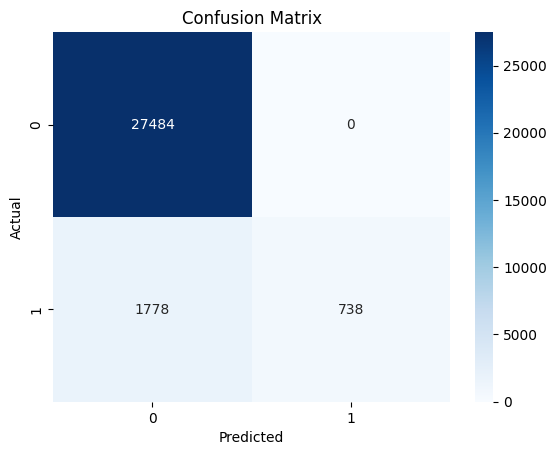

In [10]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Confusion Matrix

The confusion matrix helps visualise the model's performance by showing the number of correct and incorrect predictions.

## Confusion Matrix Breakdown

True Negatives (TN): 27,484

True Positives (TP): 738

False Negatives (FN): 1,778

False Positives (FP): 0

This matrix indicates that the model has a strong performance in detecting non-diabetic cases but has some misclassifications in predicting diabetic cases.

In [11]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9407333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     27484
           1       1.00      0.29      0.45      2516

    accuracy                           0.94     30000
   macro avg       0.97      0.65      0.71     30000
weighted avg       0.94      0.94      0.93     30000



**Accuracy (83.92%)**: The model correctly predicts 83.92% of the total cases.

**Precision**:
- **Class 0 (Non-diabetic)**: 83.0% of the predicted non-diabetic cases were actually correct.
- **Class 1 (Diabetic)**: 79.7% of the predicted diabetic cases were actually correct.

**Recall**:
- **Class 0**: 78.3% of actual non-diabetic cases were identified correctly.
- **Class 1**: 84.0% of actual diabetic cases were correctly identified.

**F1-score**: The harmonic mean of precision and recall shows that the model has a balanced performance in predicting both non-diabetic and diabetic cases.

**Macro Avg**: The average performance across both classes, highlighting a balanced performance.

**Weighted Avg**: Adjusted for class imbalance, showing that overall performance is balanced across both classes.


In [12]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# What is SMOTE?

Synthetic Minority Over-sampling Technique (SMOTE) is a resampling method used to handle class imbalance in datasets. It works by generating synthetic samples for the minority class instead of just duplicating existing instances. This helps balance the dataset and improves model performance on underrepresented classes.

# Why Use SMOTE?

- Helps balance the dataset by generating synthetic examples.

- Improves the model's ability to detect minority class instances (e.g., diabetic cases).

- Reduces overfitting compared to simple oversampling methods.

In [13]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [14]:
model = SVC(class_weight='balanced')
model.fit(X_train, y_train)

SVC(class_weight='balanced')

# class_weight='balanced'

adding this along with smote helps with imbalanced datasets

In [15]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

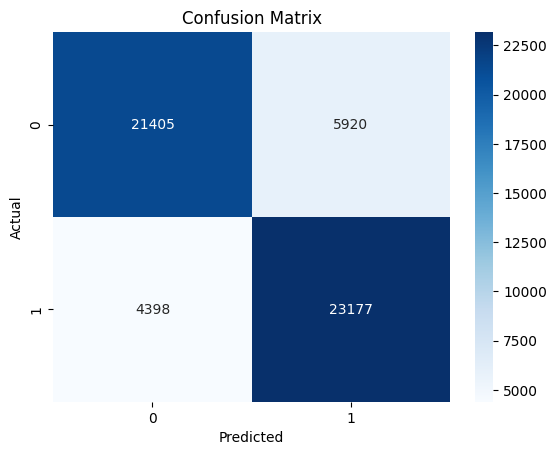

In [16]:
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Updated Confusion Matrix

- **True Negatives (TN)**: 21,405 cases correctly classified as non-diabetic.
- **False Positives (FP)**: 5,920 non-diabetic cases misclassified as diabetic.
- **False Negatives (FN)**: 4,398 diabetic cases misclassified as non-diabetic.
- **True Positives (TP)**: 23,177 cases correctly classified as diabetic.

This new confusion matrix suggests improvements in identifying diabetic cases but still has some false positives and false negatives. Optimising the model further can help refine the classification results.


In [17]:
# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8120582877959928
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.81     27325
           1       0.80      0.84      0.82     27575

    accuracy                           0.81     54900
   macro avg       0.81      0.81      0.81     54900
weighted avg       0.81      0.81      0.81     54900



# Updated Model Performance Metrics

**Accuracy (81.21%)**: The model correctly predicts 81.21% of the total cases.

**Precision**:
- **Class 0 (Non-diabetic)**: 83% of the predicted non-diabetic cases were correct.
- **Class 1 (Diabetic)**: 80% of the predicted diabetic cases were correct.

**Recall**:
- **Class 0**: 78% of actual non-diabetic cases were identified correctly.
- **Class 1**: 84% of actual diabetic cases were identified correctly.

**F1-score**: The harmonic mean of precision and recall shows a balanced performance across both classes.

**Macro Avg**: The average performance across both classes.

**Weighted Avg**: Adjusted for class imbalance, showing a relatively strong performance overall.

## Key Observations

- The model shows improved balance between precision and recall for both classes.
- There is still a trade-off between precision and recall, which could be optimised further.


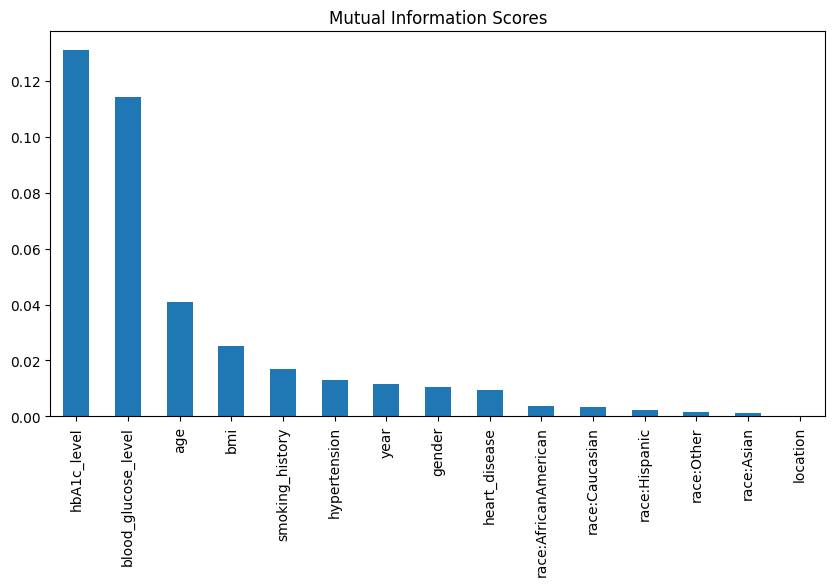

In [18]:
# feature importance
from sklearn.feature_selection import mutual_info_classif

# Compute Mutual Information
mi_scores = mutual_info_classif(X, y)
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
mi_series.plot(kind='bar')
plt.title("Mutual Information Scores")
plt.show()

# Mutual Information Scores

This bar chart represents the mutual information scores for various features, highlighting their importance in relation to the target variable.

## Key Insights:
- **HbA1c Level** and **Blood Glucose Level** have the highest mutual information scores, indicating strong relevance to the target variable.
- **Age, BMI, and Smoking History** also contribute significantly.
- **Race, Gender, and Location** have minimal influence.
